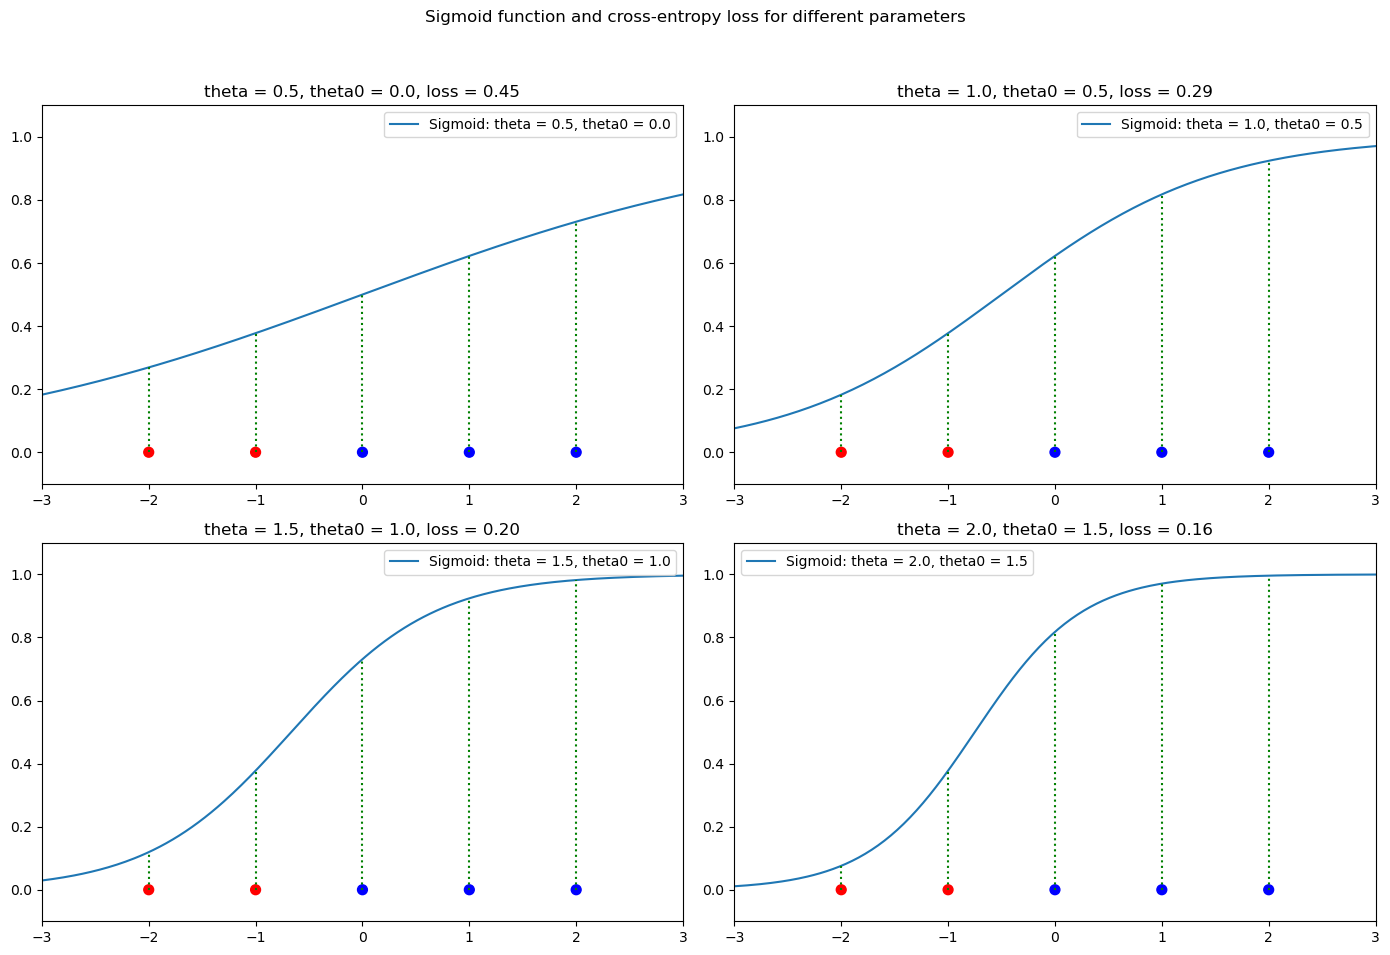

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cross-entropy loss function
def cross_entropy_loss(x, y, theta, theta0):
    z = theta * x + theta0
    p = sigmoid(z)
    p = np.clip(p, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss

# Sample data
x = np.array([-2, -1, 0, 1, 2])  # Input features
y = np.array([0, 0, 1, 1, 1])     # Binary labels (0 or 1)

# Parameter values for theta and theta0
theta_values = [0.5, 1.0, 1.5, 2.0]
theta0_values = [0.0, 0.5, 1.0, 1.5]

# Plot setup
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Sigmoid function and cross-entropy loss for different parameters")

for ax, theta, theta0 in zip(axes.flatten(), theta_values, theta0_values):
    # Generate a range of x values for plotting the sigmoid 
    x_range = np.linspace(-3, 3, 300)
    z = theta * x_range + theta0
    p = sigmoid(z)
    
    # Plot the sigmoid curve
    ax.plot(x_range, p, label=f"Sigmoid: theta = {theta}, theta0 = {theta0}")
    
    # Highlight data points on x-axis
    ax.scatter(x, np.zeros_like(x), c=['blue' if label == 1 else 'red' for label in y], s=50) 
    ax.vlines(x, 0, sigmoid(theta * x + theta0), color='green', linestyle='dotted')
    
    # Calculate and display the loss
    loss = cross_entropy_loss(x, y, theta, theta0)
    ax.title.set_text(f"theta = {theta}, theta0 = {theta0}, loss = {loss:.2f}")
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-0.1, 1.1]) 
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()